In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import hamiltonians as H
import utils
from scipy.linalg import eigh

%matplotlib inline

### Setup

In [2]:
# use nvidia gpu if available
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
# only float32 tested
dtype = torch.float64
    
print("Device:", device)
print("Data type:", dtype)

Device: cuda
Data type: torch.float64


### Ring w/ 2 particles

In [3]:
# Hamiltonian Setup
N=5000
N_proj=20
g = 1
alpha=15

In [4]:
%time Hgen = H.H_ring_2particles(N, g).type(torch.float64)

CPU times: user 1.64 s, sys: 963 ms, total: 2.61 s
Wall time: 2.24 s


In [5]:
%time eigs_t = torch.symeig(Hgen, eigenvectors=False).eigenvalues[:N_proj].cpu().numpy()
print(eigs_t)

CPU times: user 1min 10s, sys: 2.07 s, total: 1min 12s
Wall time: 4.76 s
[9.21979889e-01 3.94784165e+01 4.14504207e+01 1.57913666e+02
 1.59906418e+02 3.55305756e+02 3.57302532e+02 6.31654663e+02
 6.33652863e+02 9.86960449e+02 9.88959310e+02 1.42122302e+03
 1.42322224e+03 1.93444250e+03 1.93644194e+03 2.52661865e+03
 2.52861823e+03 3.19775171e+03 3.19975138e+03 3.94784180e+03]


In [6]:
%time eigs_sp = eigh(Hgen.cpu().numpy())[0][:N_proj]
print(eigs_sp)

CPU times: user 1min 44s, sys: 2.21 s, total: 1min 47s
Wall time: 9.76 s
[9.21979876e-01 3.94784164e+01 4.14504207e+01 1.57913666e+02
 1.59906418e+02 3.55305756e+02 3.57302532e+02 6.31654663e+02
 6.33652863e+02 9.86960449e+02 9.88959310e+02 1.42122302e+03
 1.42322224e+03 1.93444250e+03 1.93644194e+03 2.52661865e+03
 2.52861823e+03 3.19775171e+03 3.19975138e+03 3.94784180e+03]


### Ground state energy as function of basis size

In [7]:
Ns = np.unique(np.logspace(0,4,50).astype(int))
Ns

array([    1,     2,     3,     4,     5,     6,     7,     9,    11,
          13,    16,    20,    24,    29,    35,    42,    51,    62,
          75,    91,   109,   132,   159,   193,   232,   281,   339,
         409,   494,   596,   719,   868,  1048,  1264,  1526,  1842,
        2222,  2682,  3237,  3906,  4714,  5689,  6866,  8286, 10000])

In [9]:
E0s32 = []
E0s64 = []
g=1
for N in Ns:
    print("Diagonalizing ring hamiltonian. basis_size=%i, g=%0.2f" % (N,g))
    h32 = H.H_ring_2particles(N, g)
    h64 = h32.type(torch.float64)
    
    e032 = torch.symeig(h32, eigenvectors=False).eigenvalues[0].cpu().numpy()
    e064 = torch.symeig(h64, eigenvectors=False).eigenvalues[0].cpu().numpy()
    
    E0s32.append(e032)
    E0s64.append(e064)

Diagonalizing ring hamiltonian. basis_size=1, g=1.00
Diagonalizing ring hamiltonian. basis_size=2, g=1.00
Diagonalizing ring hamiltonian. basis_size=3, g=1.00
Diagonalizing ring hamiltonian. basis_size=4, g=1.00
Diagonalizing ring hamiltonian. basis_size=5, g=1.00
Diagonalizing ring hamiltonian. basis_size=6, g=1.00
Diagonalizing ring hamiltonian. basis_size=7, g=1.00
Diagonalizing ring hamiltonian. basis_size=9, g=1.00
Diagonalizing ring hamiltonian. basis_size=11, g=1.00
Diagonalizing ring hamiltonian. basis_size=13, g=1.00
Diagonalizing ring hamiltonian. basis_size=16, g=1.00
Diagonalizing ring hamiltonian. basis_size=20, g=1.00
Diagonalizing ring hamiltonian. basis_size=24, g=1.00
Diagonalizing ring hamiltonian. basis_size=29, g=1.00
Diagonalizing ring hamiltonian. basis_size=35, g=1.00
Diagonalizing ring hamiltonian. basis_size=42, g=1.00
Diagonalizing ring hamiltonian. basis_size=51, g=1.00
Diagonalizing ring hamiltonian. basis_size=62, g=1.00
Diagonalizing ring hamiltonian. basi

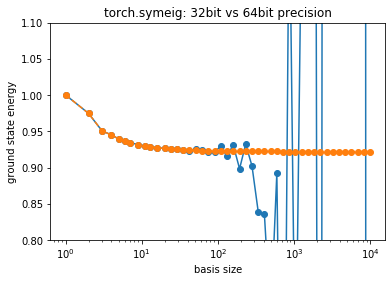

In [11]:
plt.semilogx(Ns, E0s32, 'o-', label='32bit precision')
plt.semilogx(Ns, E0s64, 'o--', label='64bit precision')
plt.xlabel("basis size")
plt.ylabel('ground state energy')
plt.title('torch.symeig: 32bit vs 64bit precision')
plt.ylim(0.8,1.1);